# Imports

In [68]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install dateutil


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
ERROR: Could not find a version that satisfies the requirement dateutil (from versions: none)
ERROR: No matching distribution found for dateutil

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the ke

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil.parser import parse

# Data Loading

In [24]:
warehouse_df = pd.read_csv('data/Cloud Warehouse Compersion Chart.csv')
expense_df = pd.read_csv('data/Expense IIGF.csv')
may_df = pd.read_csv('data/May-2022.csv')
pl_df = pd.read_csv('data/P  L March 2021.csv')
sales_df = pd.read_csv('data/Sale Report.csv')
int_sales_df = pd.read_csv('data/International sale Report.csv')
amzn_sales_df = pd.read_csv('data/Amazon Sale Report.csv')

# Data Cleaning and Preprocessing

Amazon Sale Report

In [25]:
amzn_sales_df.head()

,index,Order_ID,Order_Date,Order_Status,Fulfillment_Type,Sales_Channel,Shipping_Service_Level,Product_Style,Product_SKU,Product_Category,...,Quantity,Currency,Sale_Amount,Shipping_City,Shipping_State,Shipping_Postal_Code,Shipping_Country,Promotion_IDs,Business_to_Business,Fulfilled_By
0,0,405-8078784-5731545,4/30/2022,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship
1,1,171-9198151-1101146,4/30/2022,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship
2,2,404-0687676-7273146,4/30/2022,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN
3,3,403-9615377-8133951,4/30/2022,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship
4,4,407-1069790-7240320,4/30/2022,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN


In [27]:
# Drop unnecessary columns
amzn_sales_df.drop(columns=['index'], errors='ignore', inplace=True)

# Converting these columns to required data type to preserve their format
amzn_sales_df['Order_Date'] = pd.to_datetime(amzn_sales_df['Order_Date'], errors='coerce')

amzn_sales_df[['Shipping_Postal_Code', 'Shipping_City', 'Shipping_State', 'Shipping_Country']] = amzn_sales_df[['Shipping_Postal_Code', 'Shipping_City', 'Shipping_State', 'Shipping_Country']].astype({'Shipping_Postal_Code': 'Int64'}).astype(str)

# Imputing values for missing data
amzn_sales_df.fillna({
    'Courier_Status': 'Unknown',
    'Currency': 'INR',
    'Sale_Amount': 0,
    'Shipping_City': 'Unknown',
    'Shipping_State': 'Unknown',
    'Shipping_Postal_Code': 'Unknown',
    'Shipping_Country': 'Unknown',
    'Promotion_IDs': 'None',
    'Fulfilled_By': 'Not Specified'
}, inplace=True)

In [28]:
amzn_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Order_ID                128975 non-null  object        
 1   Order_Date              73866 non-null   datetime64[ns]
 2   Order_Status            128975 non-null  object        
 3   Fulfillment_Type        128975 non-null  object        
 4   Sales_Channel           128975 non-null  object        
 5   Shipping_Service_Level  128975 non-null  object        
 6   Product_Style           128975 non-null  object        
 7   Product_SKU             128975 non-null  object        
 8   Product_Category        128975 non-null  object        
 9   Product_Size            128975 non-null  object        
 10  Amazon_Standard_ID      128975 non-null  object        
 11  Courier_Status          128975 non-null  object        
 12  Quantity                128975

In [29]:
sns.set_style("whitegrid")

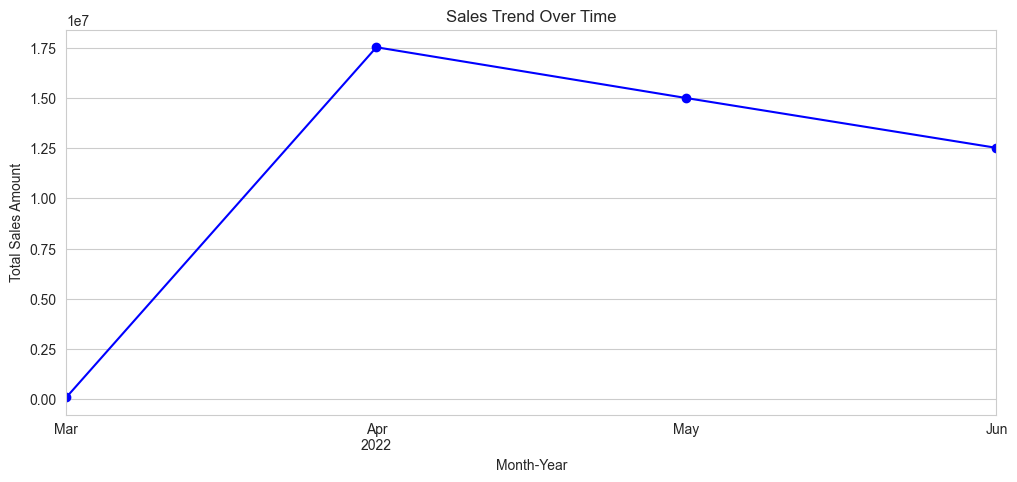

In [31]:
plt.figure(figsize=(12, 5))
amzn_sales_df.groupby(amzn_sales_df['Order_Date'].dt.to_period("M"))['Sale_Amount'].sum().plot(kind='line', marker='o', color='b')
plt.title("Sales Trend Over Time")
plt.xlabel("Month-Year")
plt.ylabel("Total Sales Amount")
plt.xticks(rotation=45)
plt.show()

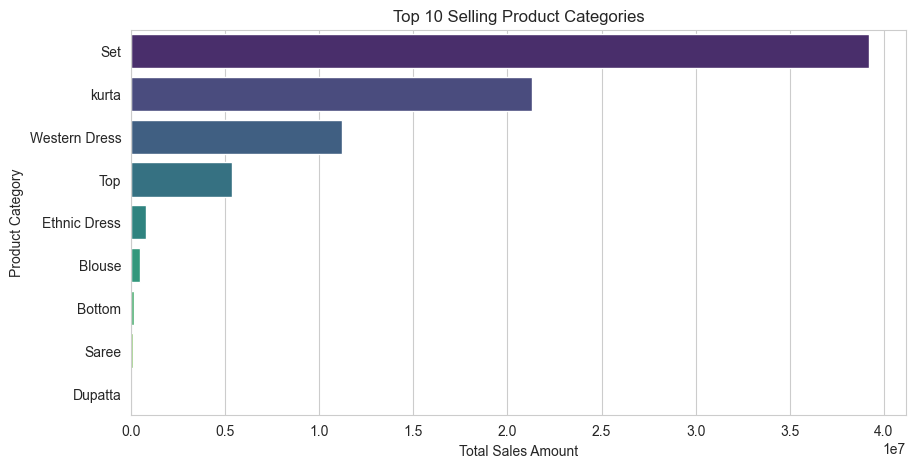

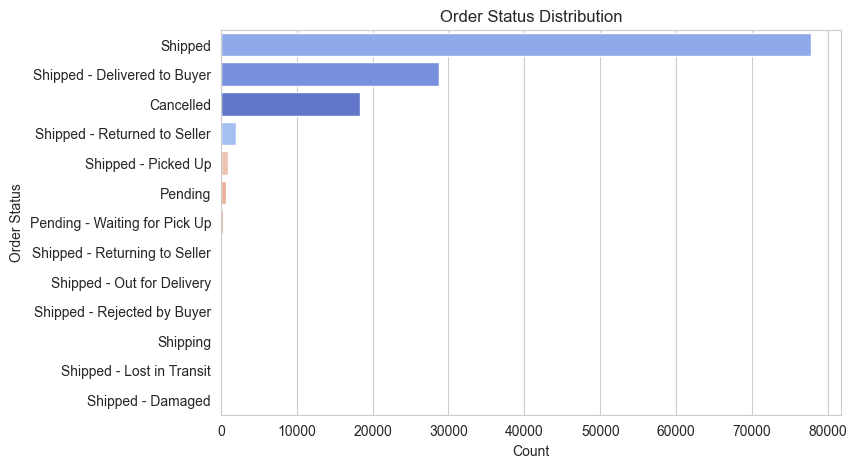

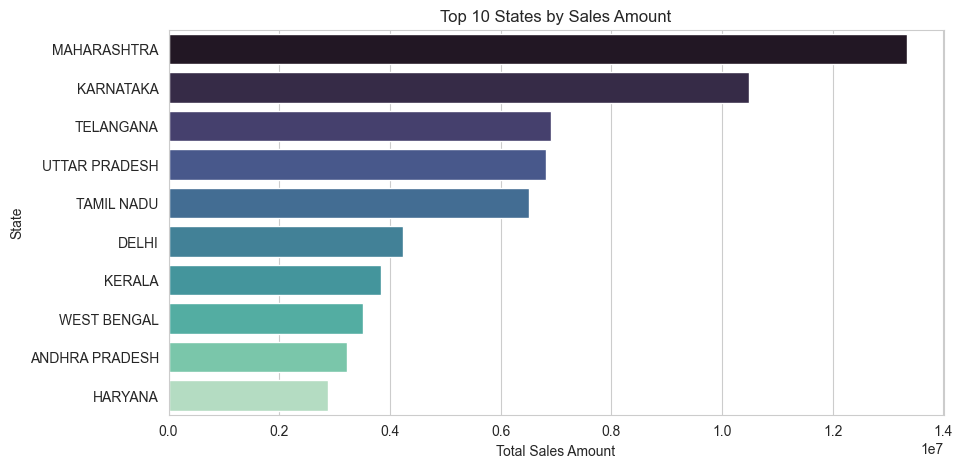

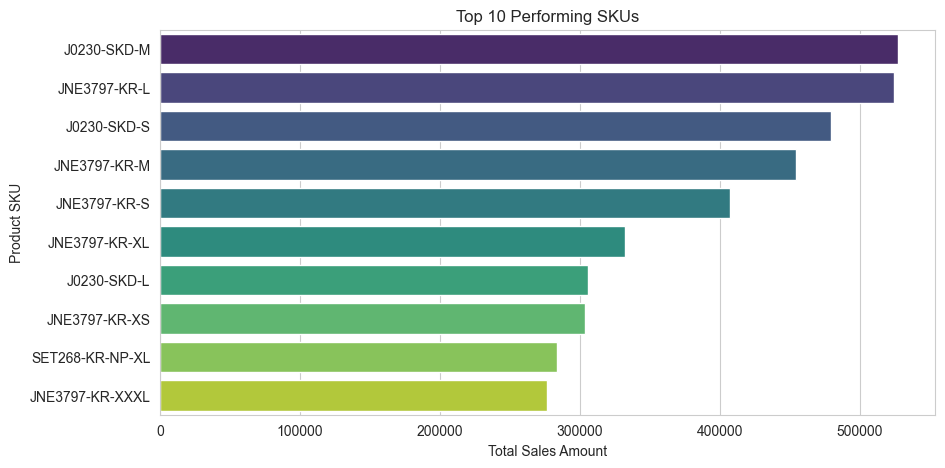

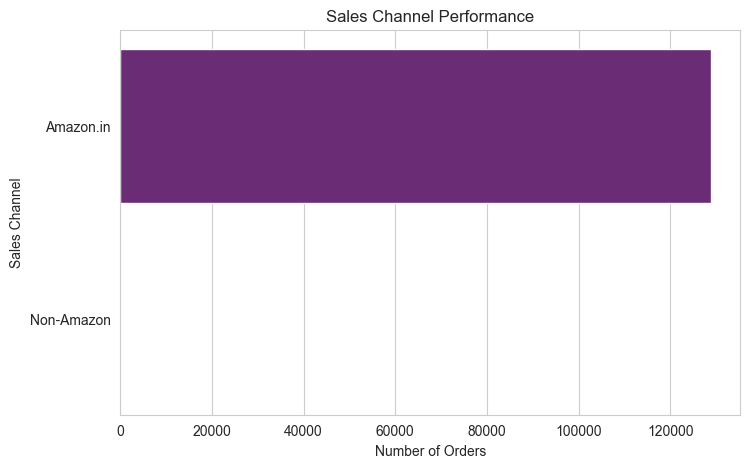

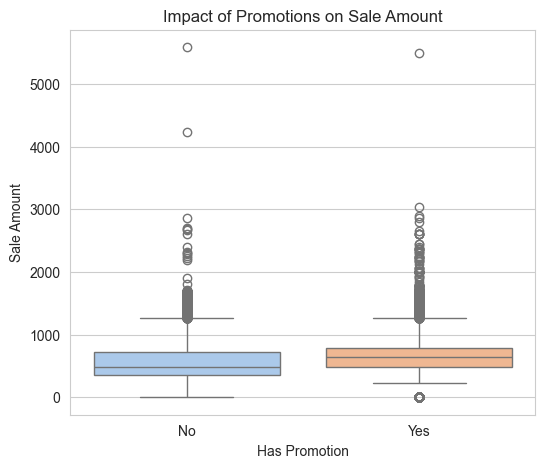

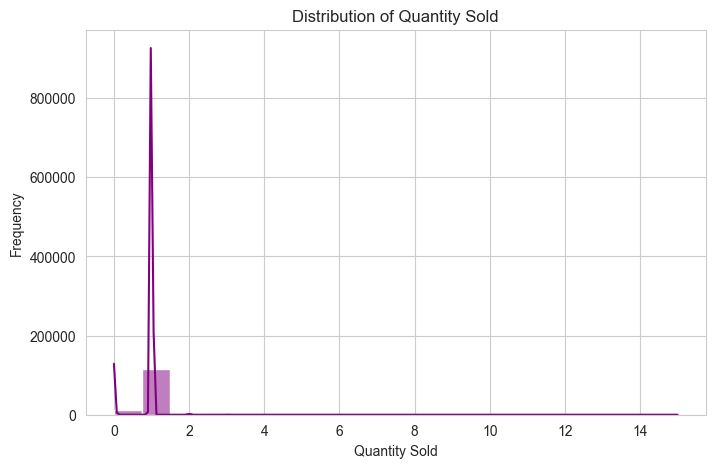

In [34]:
# Top 10 Selling Product Categories
plt.figure(figsize=(10, 5))
top_categories = amzn_sales_df.groupby('Product_Category')['Sale_Amount'].sum().nlargest(10)
sns.barplot(x=top_categories.values, y=top_categories.index, hue=top_categories.index, palette='viridis', legend=False)
plt.title("Top 10 Selling Product Categories")
plt.xlabel("Total Sales Amount")
plt.ylabel("Product Category")
plt.show()

# Order Status Distribution
plt.figure(figsize=(8, 5))
sns.countplot(y=amzn_sales_df['Order_Status'], hue=amzn_sales_df['Order_Status'], order=amzn_sales_df['Order_Status'].value_counts().index, palette='coolwarm', legend=False)
plt.title("Order Status Distribution")
plt.xlabel("Count")
plt.ylabel("Order Status")
plt.show()

# Top 10 States by Sales Amount
plt.figure(figsize=(10, 5))
top_states = amzn_sales_df.groupby('Shipping_State')['Sale_Amount'].sum().nlargest(10)
sns.barplot(x=top_states.values, y=top_states.index, hue=top_states.index, palette='mako', legend=False)
plt.title("Top 10 States by Sales Amount")
plt.xlabel("Total Sales Amount")
plt.ylabel("State")
plt.show()

# Top 10 Performing SKUs
plt.figure(figsize=(10, 5))
top_skus = amzn_sales_df.groupby('Product_SKU')['Sale_Amount'].sum().nlargest(10)
sns.barplot(x=top_skus.values, y=top_skus.index, hue=top_skus.index, palette='viridis', legend=False)
plt.title("Top 10 Performing SKUs")
plt.xlabel("Total Sales Amount")
plt.ylabel("Product SKU")
plt.show()

# Sales Channel Performance
plt.figure(figsize=(8, 5))
sns.countplot(y=amzn_sales_df['Sales_Channel'], hue=amzn_sales_df['Sales_Channel'], order=amzn_sales_df['Sales_Channel'].value_counts().index, palette='magma', legend=False)
plt.title("Sales Channel Performance")
plt.xlabel("Number of Orders")
plt.ylabel("Sales Channel")
plt.show()

# Impact of Promotions on Sale Amount
amzn_sales_df['Has_Promotion'] = amzn_sales_df['Promotion_IDs'].apply(lambda x: 'Yes' if x != 'None' else 'No')
plt.figure(figsize=(6, 5))
sns.boxplot(x='Has_Promotion', y='Sale_Amount', data=amzn_sales_df, hue='Has_Promotion', palette='pastel', legend=False)
plt.title("Impact of Promotions on Sale Amount")
plt.xlabel("Has Promotion")
plt.ylabel("Sale Amount")
plt.show()

# Quantity Sold Distribution
plt.figure(figsize=(8, 5))
sns.histplot(amzn_sales_df['Quantity'], bins=20, kde=True, color='purple')
plt.title("Distribution of Quantity Sold")
plt.xlabel("Quantity Sold")
plt.ylabel("Frequency")
plt.show()


Cloud Warehouse Comparison Chart

In [5]:
warehouse_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   index                   50 non-null     int64 
 1   Shiprocket_Performance  21 non-null     object
 2   Unnamed: 1              41 non-null     object
 3   INCREFF_Performance     28 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.7+ KB


In [35]:
warehouse_df

,index,Shiprocket_Performance,Unnamed: 1,INCREFF_Performance
0,0,Heads,Price (Per Unit),Price (Per Unit)
1,1,Inbound (Fresh Stock and RTO),₹4.00,4
2,2,Outbound,₹7.00,11
3,3,Storage Fee/Cft,₹25.00,Rs 0.15/- Per Day
4,4,Customer Return with Detailed QC,₹6.00,15.5
5,5,(A) SCOPE OF WORK and STANDARD OPERATING PROCE...,NaN,NaN
6,6,Inward,Unloading,• Boxes counted and weighed. Data captured in ...
7,7,NaN,Validation,• GRN will be initiated against a valid PO doc...
8,8,NaN,QC,• No QC to be done (Outer Visual Inspection an...
9,9,NaN,GRN,• Scanning (Goods will have scannable EAN cod...


Expense IIGF

In [47]:
expense_df

,index,Received_Amount,Unnamed: 1,Expense_Amount,Unnamed: 3
0,0,Particular,Amount,Particular,Amount
1,1,6/19/2022,1000,Large Bag,380
2,2,6/20/2022,1500,"Stationary(Soft Pin, Paper pin for Dupatta, Fe...",170
3,3,6/22/2022,500,OLA,839
4,4,6/23/2022,2000,Auto Rent,520
5,5,NaN,NaN,TT Fine,500
6,6,NaN,NaN,Bhushan Hotel,2506
7,7,NaN,NaN,Food,1290
8,8,NaN,NaN,Expomart Labour Charge,200
9,9,NaN,NaN,Choclate,400


In [55]:
# Cleaning
expense_df_cleaned = expense_df.iloc[1:].reset_index(drop=True)
expense_df_cleaned.columns = ["Index", "Date_Received", "Received_Amount", "Expense_Item", "Expense_Amount"]
expense_df_cleaned.drop(columns=["Index"], inplace=True)
expense_df_cleaned = expense_df_cleaned.drop(columns=["Date_Received"], errors="ignore")
expense_df_cleaned["Received_Amount"] = pd.to_numeric(expense_df_cleaned["Received_Amount"], errors='coerce')
expense_df_cleaned["Expense_Amount"] = pd.to_numeric(expense_df_cleaned["Expense_Amount"], errors='coerce')

# Imputing missing values
expense_df_cleaned['Received_Amount'].fillna(0, inplace=True)
expense_df_cleaned['Expense_Amount'].fillna(0, inplace=True)


# Drop last row as it contains total values
expense_df_cleaned.drop(expense_df_cleaned.tail(3).index, inplace=True)


/var/folders/nr/khgwm2yx29l9jhcvccmdjmn8q2_1zk/T/ipykernel_42514/2445936340.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  expense_df_cleaned['Received_Amount'].fillna(0, inplace=True)
/var/folders/nr/khgwm2yx29l9jhcvccmdjmn8q2_1zk/T/ipykernel_42514/2445936340.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are sett

In [56]:
expense_df_cleaned

,Received_Amount,Expense_Item,Expense_Amount
0,1000.0,Large Bag,380
1,1500.0,"Stationary(Soft Pin, Paper pin for Dupatta, Fe...",170
2,500.0,OLA,839
3,2000.0,Auto Rent,520
4,0.0,TT Fine,500
5,0.0,Bhushan Hotel,2506
6,0.0,Food,1290
7,0.0,Expomart Labour Charge,200
8,0.0,Choclate,400
9,0.0,Bhushan Cash,800


In [57]:
# Total Received Amount
total_received_amount = expense_df_cleaned['Received_Amount'].sum()
total_expense_amount = expense_df_cleaned['Expense_Amount'].sum()
pending_amount = total_received_amount - total_expense_amount

print("Total Received Amount:", total_received_amount)
print("Total Expense Amount:", total_expense_amount)
print("Pending Amount:", pending_amount)

Total Received Amount: 5000.0
Total Expense Amount: 8095
Pending Amount: -3095.0


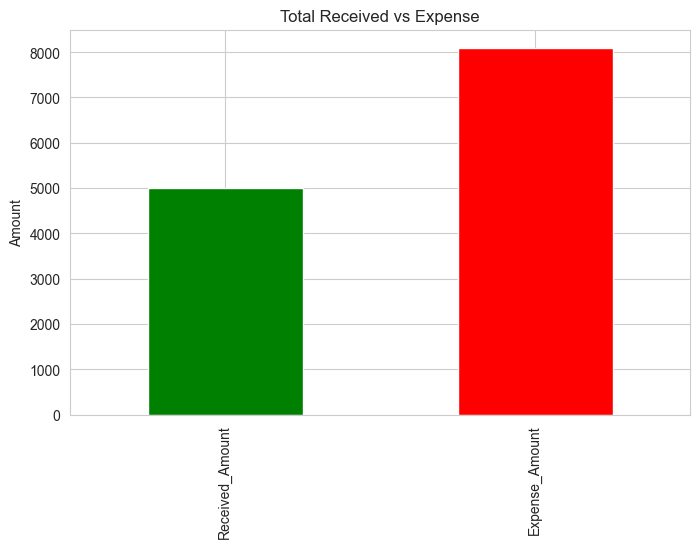

In [58]:
plt.figure(figsize=(8, 5))
expense_df_cleaned[['Received_Amount', 'Expense_Amount']].sum().plot(kind='bar', color=['green', 'red'])
plt.title("Total Received vs Expense")
plt.ylabel("Amount")
plt.show()

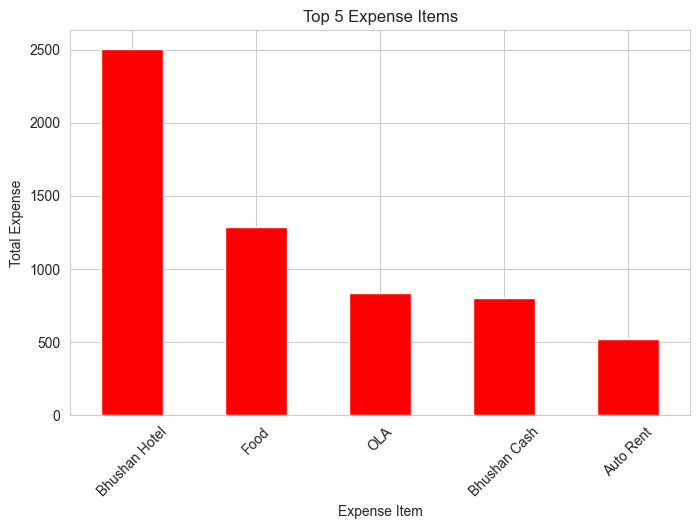

In [59]:
top_expenses = expense_df_cleaned.groupby("Expense_Item")["Expense_Amount"].sum().nlargest(5)
plt.figure(figsize=(8, 5))
top_expenses.plot(kind='bar', color='red')
plt.title("Top 5 Expense Items")
plt.ylabel("Total Expense")
plt.xlabel("Expense Item")
plt.xticks(rotation=45)
plt.show()


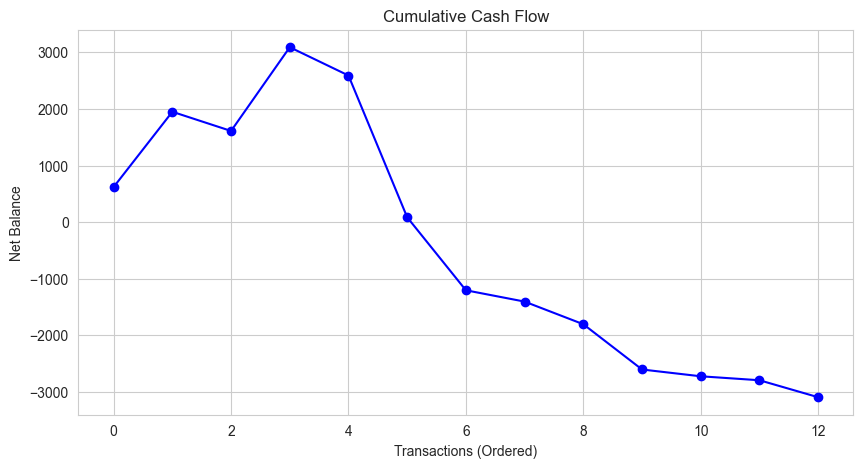

In [61]:
expense_df_cleaned["Net Flow"] = expense_df_cleaned["Received_Amount"] - expense_df_cleaned["Expense_Amount"]
expense_df_cleaned["Cumulative Flow"] = expense_df_cleaned["Net Flow"].cumsum()
plt.figure(figsize=(10, 5))
plt.plot(expense_df_cleaned["Cumulative Flow"], marker='o', linestyle='-', color='blue')
plt.title("Cumulative Cash Flow")
plt.ylabel("Net Balance")
plt.xlabel("Transactions (Ordered)")
plt.show()

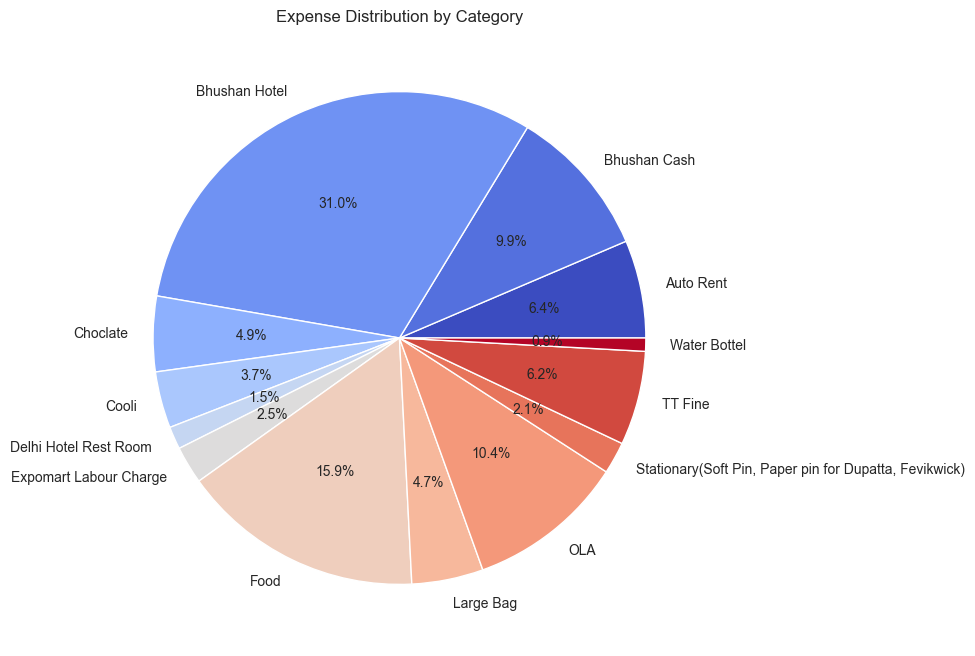

In [63]:
plt.figure(figsize=(8, 8))
expense_df_cleaned.groupby("Expense_Item")["Expense_Amount"].sum().plot(kind='pie', autopct='%1.1f%%', cmap='coolwarm')
plt.title("Expense Distribution by Category")
plt.ylabel("")
plt.show()

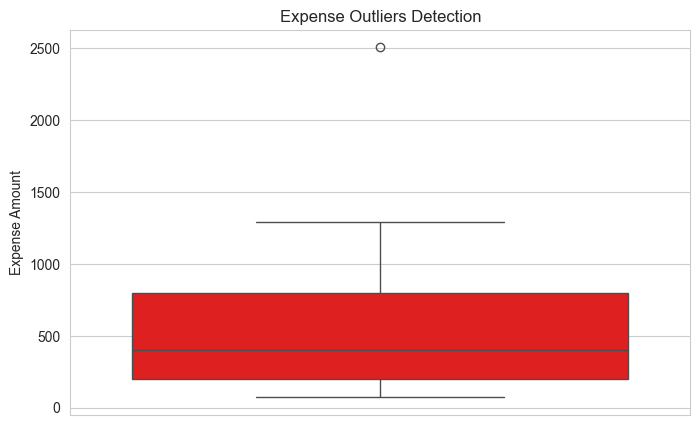

In [64]:
plt.figure(figsize=(8, 5))
sns.boxplot(y=expense_df_cleaned["Expense_Amount"], color='red')
plt.title("Expense Outliers Detection")
plt.ylabel("Expense Amount")
plt.show()

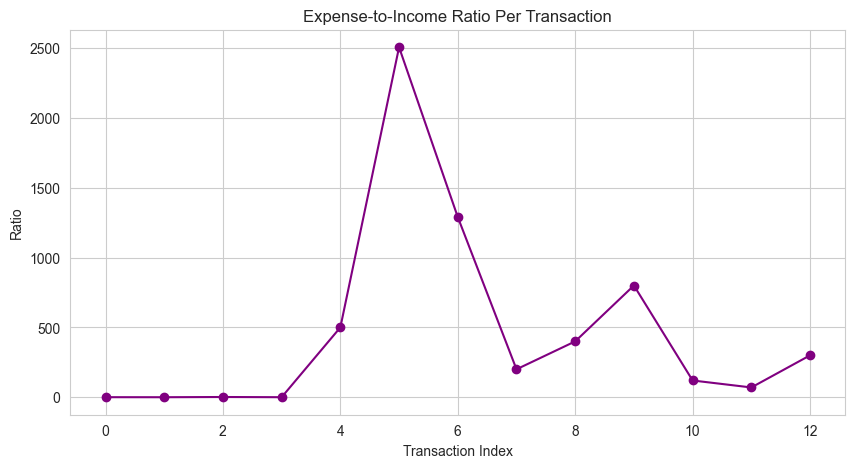

In [65]:
expense_df_cleaned['Expense_to_Income'] = expense_df_cleaned['Expense_Amount'] / (expense_df_cleaned['Received_Amount'] + 1)
plt.figure(figsize=(10, 5))
plt.plot(expense_df_cleaned['Expense_to_Income'], marker='o', linestyle='-', color='purple')
plt.title("Expense-to-Income Ratio Per Transaction")
plt.ylabel("Ratio")
plt.xlabel("Transaction Index")
plt.show()

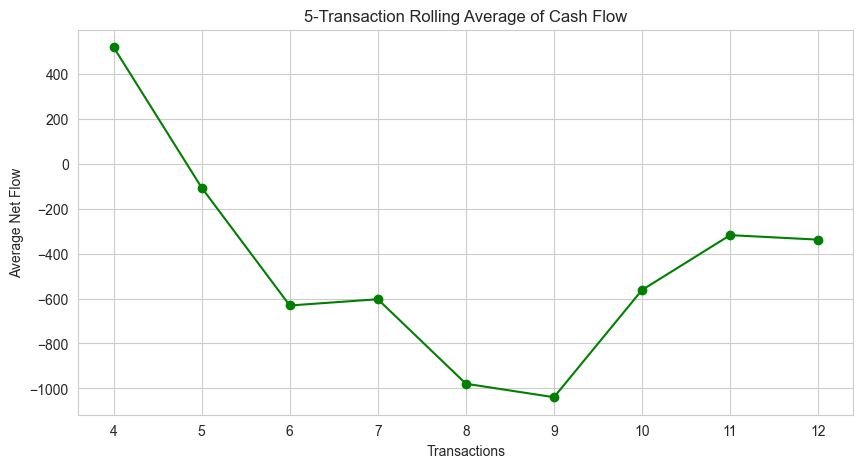

In [66]:
expense_df_cleaned['Rolling_Cash_Flow'] = expense_df_cleaned['Net Flow'].rolling(window=5).mean()
plt.figure(figsize=(10, 5))
plt.plot(expense_df_cleaned['Rolling_Cash_Flow'], marker='o', linestyle='-', color='green')
plt.title("5-Transaction Rolling Average of Cash Flow")
plt.ylabel("Average Net Flow")
plt.xlabel("Transactions")
plt.show()

International Sale Report

In [62]:
int_sales_df.head()

,index,Sale_Date,Sale_Month,Customer_Name,Product_Style,Product_SKU,Product_Size,Quantity_Purchased,Price_per_Unit,Gross_Amount
0,0,6/5/2021,21-Jun,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-L,L,1,616.56,617
1,1,6/5/2021,21-Jun,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-XL,XL,1,616.56,617
2,2,6/5/2021,21-Jun,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-XXL,XXL,1,616.56,617
3,3,6/5/2021,21-Jun,REVATHY LOGANATHAN,MEN5009,MEN5009-KR-L,L,1,616.56,617
4,4,6/5/2021,21-Jun,REVATHY LOGANATHAN,MEN5011,MEN5011-KR-L,L,1,616.56,617


In [130]:
def is_date(string):
    try:
        if pd.isna(string):
            return False
        parse(str(string))
        return True
    except (ValueError, TypeError):
        return False

# Counting date and non-date values
date_count = int_sales_df['Sale_Date'].apply(is_date).sum()
non_date_count = len(int_sales_df) - date_count

print(f"Number of date values: {date_count}")
print(f"Number of non-date values: {non_date_count}")
print("Length of the DataFrame:", len(int_sales_df))

Number of date values: 18643
Number of non-date values: 18789
Length of the DataFrame: 37432


In [ ]:
# Read each section of the dataset seperately

sales_data = pd.read_csv('data/International sale Report.csv', header=None, nrows=18664, skiprows=1)
sales_data.columns = ['index', 'Sale_Date', 'Sale_Month', 'Customer_Name', 'Product_Style', 'Product_SKU', 'Product_Size', 'Quantity_Purchased', 'Price_per_Unit', 'Gross_Amount']
sales_data = sales_data.dropna(axis=1, how='all')

sku_data = pd.read_csv('data/International sale Report.csv', header=None, skiprows=18637, nrows=22, usecols=range(1,2))
sku_data.columns = ['SKU']
sku_data = sku_data.dropna(axis=1, how='all')

style_stock_data = pd.read_csv('data/International sale Report.csv', header=None, skiprows=18662, nrows=1014, usecols=range(1,3))
style_stock_data.columns = ['Style', 'Stock']
style_stock_data = style_stock_data.dropna(axis=1, how='all')

detailed_sales_data = pd.read_csv('data/International sale Report.csv', header=None, skiprows=19678, usecols=range(1,10))
detailed_sales_data.columns = ['CUSTOMER', 'DATE', 'Months', 'Style', 'SKU', 'PCS', 'RATE', 'GROSS AMT', 'Stock']
detailed_sales_data = detailed_sales_data.dropna(axis=1, how='all')

In [162]:
sales_data

,index,Sale_Date,Sale_Month,Customer_Name,Product_Style,Product_SKU,Product_Size,Quantity_Purchased,Price_per_Unit,Gross_Amount
0,0,6/5/2021,21-Jun,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-L,L,1.0,616.56,617.0
1,1,6/5/2021,21-Jun,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-XL,XL,1.0,616.56,617.0
2,2,6/5/2021,21-Jun,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-XXL,XXL,1.0,616.56,617.0
3,3,6/5/2021,21-Jun,REVATHY LOGANATHAN,MEN5009,MEN5009-KR-L,L,1.0,616.56,617.0
4,4,6/5/2021,21-Jun,REVATHY LOGANATHAN,MEN5011,MEN5011-KR-L,L,1.0,616.56,617.0
...,...,...,...,...,...,...,...,...,...,...
18659,18659,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18660,18660,Style,Stock,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18661,18661,MEN5004,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18662,18662,MEN5009,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [166]:
sku_data

,SKU
0,JNE3826
1,JNE3827
2,JNE3828
3,JNE3853
4,JNE3855
5,JNE3858
6,JNE3829
7,JNE3830
8,JNE3849
9,JNE3852


In [170]:
style_stock_data

,Style,Stock
0,MEN5004,43
1,MEN5009,55
2,MEN5011,53
3,MEN5025,34
4,MEN5015,119
...,...,...
1009,J0419,313
1010,JNE3905,299
1011,23-Jan,0
1012,J0391,270


In [171]:
detailed_sales_data

,CUSTOMER,DATE,Months,Style,SKU,PCS,RATE,GROSS AMT,Stock
0,REVATHY LOGANATHAN,6/5/2021,21-Jun,MEN5004,MEN5004-KR-XL,1,616.56,617,4
1,REVATHY LOGANATHAN,6/5/2021,21-Jun,MEN5004,MEN5004-KR-XXL,1,616.56,617,6
2,REVATHY LOGANATHAN,6/5/2021,21-Jun,MEN5009,MEN5009-KR-L,1,616.56,617,6
3,REVATHY LOGANATHAN,6/5/2021,21-Jun,MEN5011,MEN5011-KR-L,1,616.56,617,11
4,REVATHY LOGANATHAN,6/5/2021,21-Jun,MEN5025,MEN5025-KR-L,1,649.03,649,6
...,...,...,...,...,...,...,...,...,...
17750,AVIN,3/31/2022,22-Mar,PJNE3423,PJNE3423-KR-4XL,1,537.50,538,4
17751,AVIN,3/31/2022,22-Mar,PJNE3404,PJNE3404-KR-4XL,1,500.00,500,5
17752,AVIN,3/31/2022,22-Mar,PJNE3423,PJNE3423-KR-4XL,1,537.50,538,4
17753,AVIN,3/31/2022,22-Mar,SET290,SET290-KR-DPT-M,1,812.50,812,7


In [190]:
# Handling missing values and preserving format for sales data

sales_data.drop(columns=['index'], errors='ignore', inplace=True)
sales_data.drop(columns=["Category"], errors="ignore", inplace=True)
sales_data['Sale_Date'] = pd.to_datetime(sales_data['Sale_Date'], errors='coerce',format='%d/%m/%Y')
sales_data['Quantity_Purchased'] = pd.to_numeric(sales_data['Quantity_Purchased'], errors='coerce')
sales_data['Gross_Amount'] = pd.to_numeric(sales_data['Gross_Amount'], errors='coerce')
sales_data['Price_per_Unit'] = pd.to_numeric(sales_data['Price_per_Unit'], errors='coerce')
sales_data['Sale_Month'] = pd.to_datetime(sales_data['Sale_Month'], errors='coerce', format='%Y-%m')
sales_data.fillna(0, inplace=True)

# Handling missing values and preserving format for style-stock data
style_stock_data['Stock'] = pd.to_numeric(style_stock_data['Stock'], errors='coerce')
style_stock_data.fillna(0, inplace=True)

# Handling missing values and preserving format for detailed sales data
detailed_sales_data['PCS'] = pd.to_numeric(detailed_sales_data['PCS'], errors='coerce')
detailed_sales_data['RATE'] = pd.to_numeric(detailed_sales_data['RATE'], errors='coerce')
detailed_sales_data['GROSS AMT'] = pd.to_numeric(detailed_sales_data['GROSS AMT'], errors='coerce')
detailed_sales_data.fillna(0, inplace=True)

/var/folders/nr/khgwm2yx29l9jhcvccmdjmn8q2_1zk/T/ipykernel_42514/2564010531.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  sales_data.fillna(0, inplace=True)
/var/folders/nr/khgwm2yx29l9jhcvccmdjmn8q2_1zk/T/ipykernel_42514/2564010531.py:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sales_data.fillna(0, inplace=True)


In [193]:
# Sales Trend Analysis
total_sales = sales_data['Quantity_Purchased'].sum()
daily_sales = sales_data.groupby('Sale_Date')['Quantity_Purchased'].sum()
monthly_sales = sales_data.groupby('Sale_Month')['Quantity_Purchased'].sum()

# Top Selling Products
top_products = sales_data.groupby('Product_SKU')['Quantity_Purchased'].sum().sort_values().head(10)

# Customer Analysis
top_customers = sales_data.groupby('Customer_Name')['Gross_Amount'].sum().sort_values().head(5)

# Product Category Performance
sales_data['Category'] = sales_data['Product_SKU']
category_sales = sales_data.groupby('Category')['Quantity_Purchased'].sum().sort_values()

# Size Distribution
size_distribution = sales_data.groupby('Product_Size')['Quantity_Purchased'].sum().sort_values()

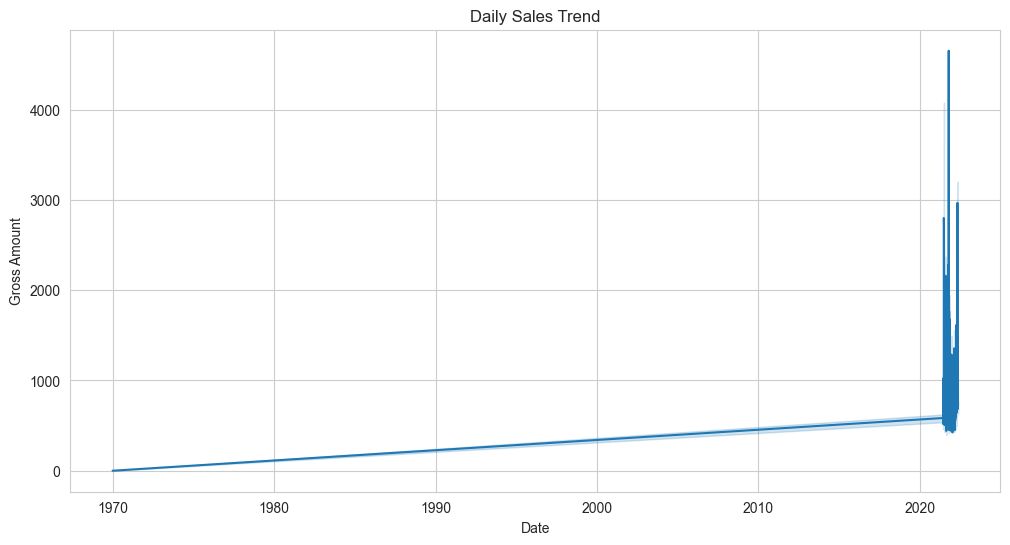

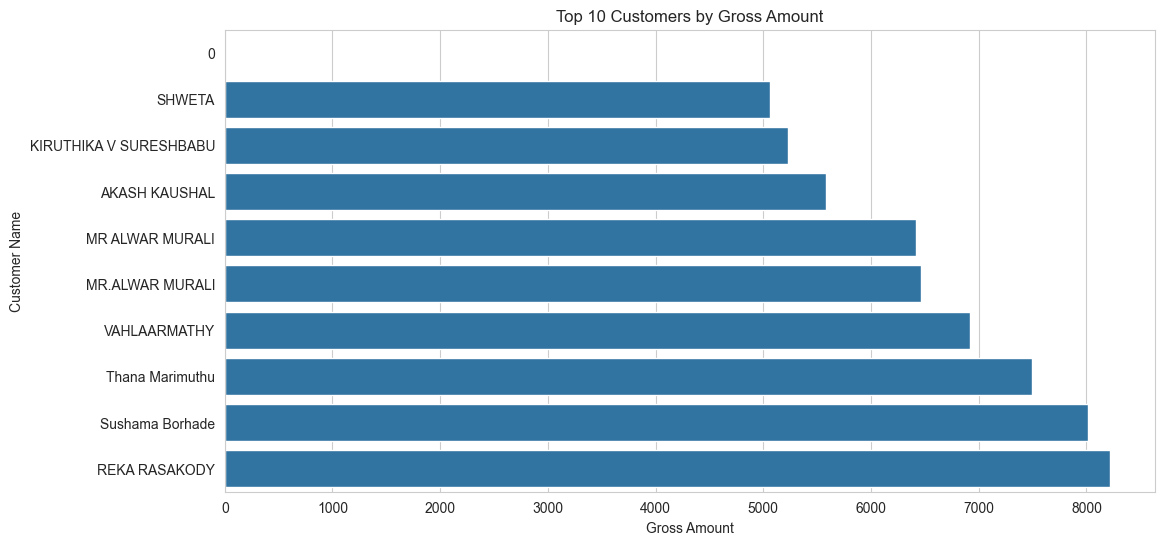

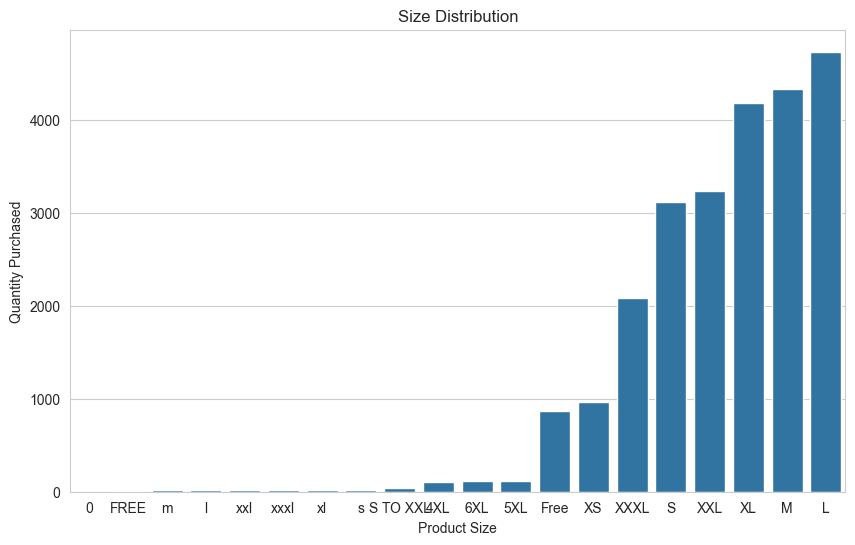

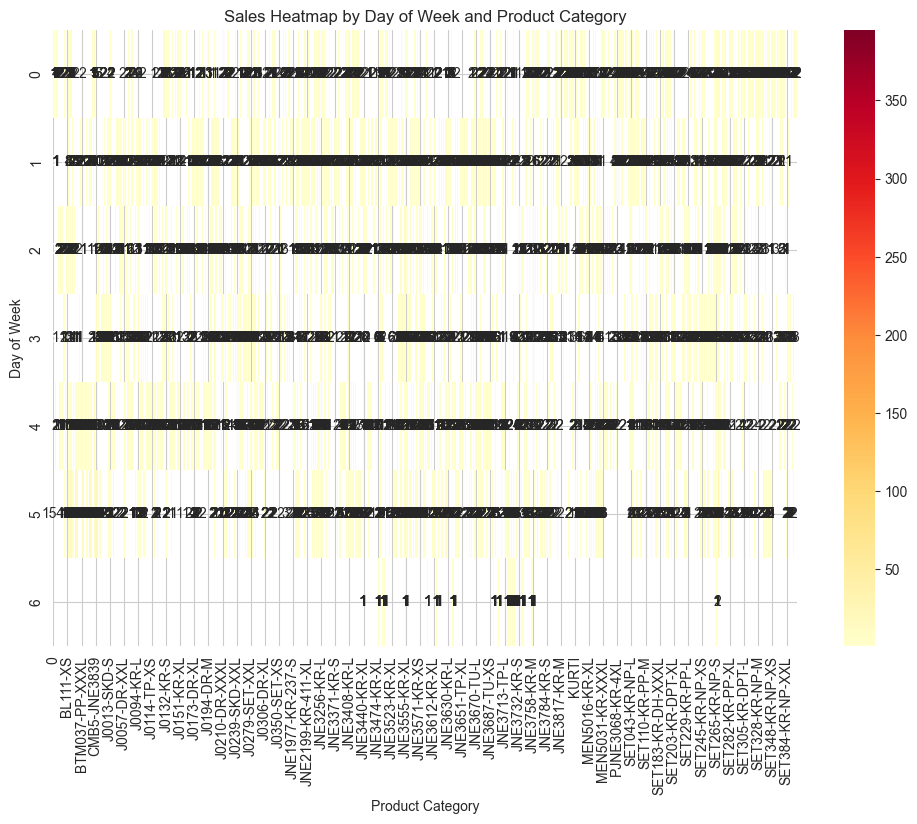

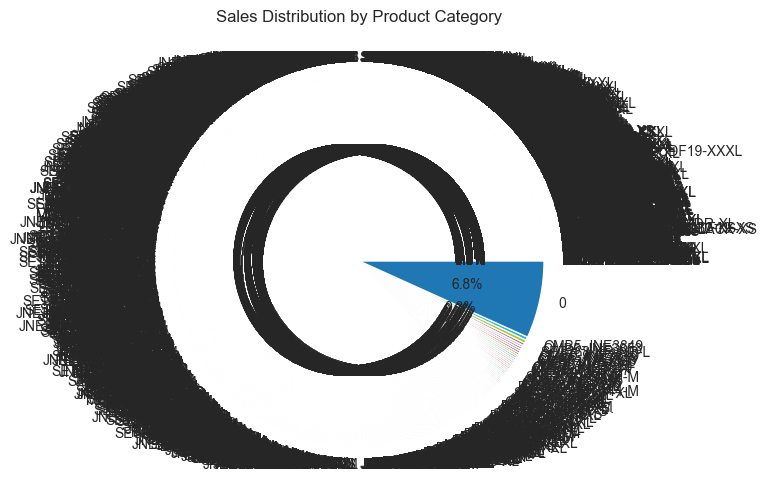

Total sales: $15,768,162.19
Average order value: $844.84
Best selling month: 0 ($15,768,162.19)
Worst selling month: 0 ($15,768,162.19)
Most popular product: BL013-62BLACK (1.0 units)
Top customer: 0 ($0.00)
Most popular size: 0 (0.0 units)


In [ ]:


# Sales Trend Analysis
plt.figure(figsize=(12, 6))
sns.lineplot(x='Sale_Date', y='Gross_Amount', data=sales_data)
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Gross Amount')
plt.show()

# # Top Selling Products
# top_products = sales_data.groupby('Product_SKU')['Quantity_Purchased'].sum().sort_values().head(10)
# plt.figure(figsize=(12, 6))
# sns.barplot(x=top_products.index, y=top_products.values)
# plt.title('Top 10 Selling Products')
# plt.xlabel('Product SKU')
# plt.ylabel('Quantity Purchased')
# plt.xticks(rotation=45)
# plt.savefig('top_selling_products.png')

# Customer Analysis
top_customers = sales_data.groupby('Customer_Name')['Gross_Amount'].sum().sort_values().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_customers.values, y=top_customers.index)
plt.title('Top 10 Customers by Gross Amount')
plt.xlabel('Gross Amount')
plt.ylabel('Customer Name')
plt.show()

# Size Distribution
size_distribution = sales_data.groupby('Product_Size')['Quantity_Purchased'].sum().sort_values()
plt.figure(figsize=(10, 6))
sns.barplot(x=size_distribution.index, y=size_distribution.values)
plt.title('Size Distribution')
plt.xlabel('Product Size')
plt.ylabel('Quantity Purchased')
plt.show()

# Sales Heatmap by Day of Week and Product_SKU
pivot = sales_data.pivot_table(values='Quantity_Purchased', index=sales_data['Sale_Date'].dt.dayofweek, columns='Product_SKU', aggfunc='sum')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot, cmap='YlOrRd', annot=True, fmt='g')
plt.title('Sales Heatmap by Day of Week and Product Category')
plt.xlabel('Product Category')
plt.ylabel('Day of Week')
plt.show()

# Sales Distribution by Product Category(SKU)
plt.figure(figsize=(10, 6))
category_sales.plot(kind='pie', autopct='%1.1f%%', title='Sales Distribution by Product Category')
plt.show()

# Additional Insights
monthly_sales = sales_data.groupby('Sale_Month')['Gross_Amount'].sum()
print(f"Total sales: ${sales_data['Gross_Amount'].sum():,.2f}")
print(f"Average order value: ${sales_data['Gross_Amount'].mean():,.2f}")
print(f"Best selling month: {monthly_sales.idxmax()} (${monthly_sales.max():,.2f})")
print(f"Worst selling month: {monthly_sales.idxmin()} (${monthly_sales.min():,.2f})")
print(f"Most popular product: {top_products.index[0]} ({top_products.values[0]} units)")
print(f"Top customer: {top_customers.index[0]} (${top_customers.values[0]:,.2f})")
print(f"Most popular size: {size_distribution.index[0]} ({size_distribution.values[0]} units)")


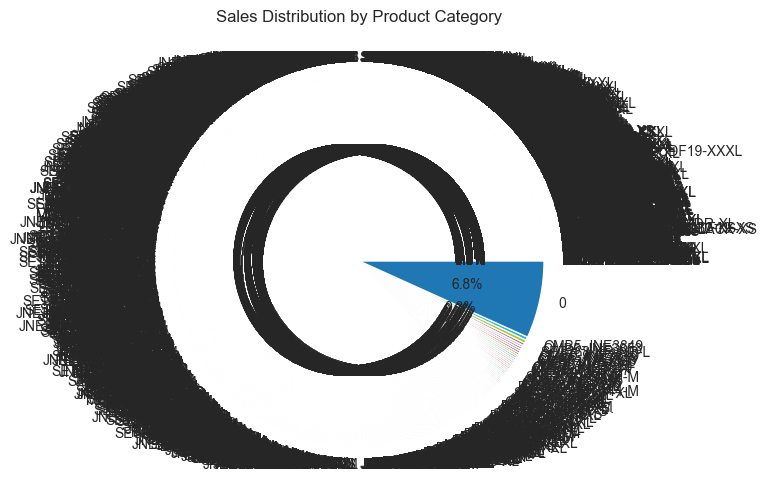

Total sales: 24017.0 units

Top selling products:
Product_SKU
BL013-62BLACK       1.0
BL011-62PINK        1.0
AN209-BIEGE-XXL     1.0
AN205-YELLOW-S      1.0
AN205-YELLOW-M      1.0
AN205-YELLOW-L      1.0
AN204-PURPLE-M      1.0
AN202-ORANGE-XXL    1.0
AN202-ORANGE-XL     1.0
AN202-ORANGE-S      1.0
Name: Quantity_Purchased, dtype: float64

Top customers:
Customer_Name
0                            0.0
SHWETA                    5058.0
KIRUTHIKA V SURESHBABU    5231.0
AKASH KAUSHAL             5580.0
MR ALWAR MURALI           6418.0
Name: Gross_Amount, dtype: float64

Product category performance:
Category
BL013-62BLACK         1.0
BL011-62PINK          1.0
AN209-BIEGE-XXL       1.0
AN205-YELLOW-S        1.0
AN205-YELLOW-M        1.0
                    ...  
CMB5-JNE3840         45.0
SET268-KR-NP-L       55.0
CMB5-JNE3853         70.0
CMB5-JNE3849         70.0
0                  1623.0
Name: Quantity_Purchased, Length: 4591, dtype: float64

Size distribution:
Product_Size
0            

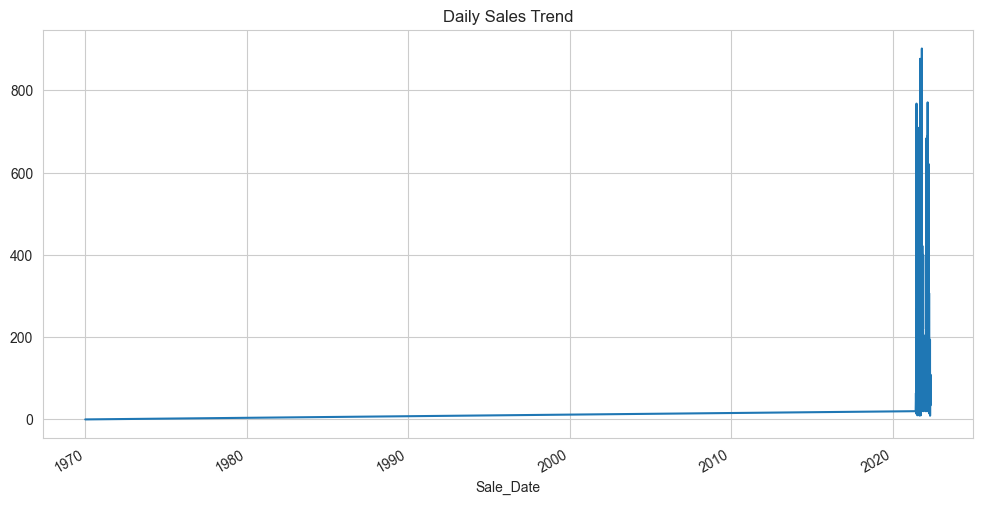

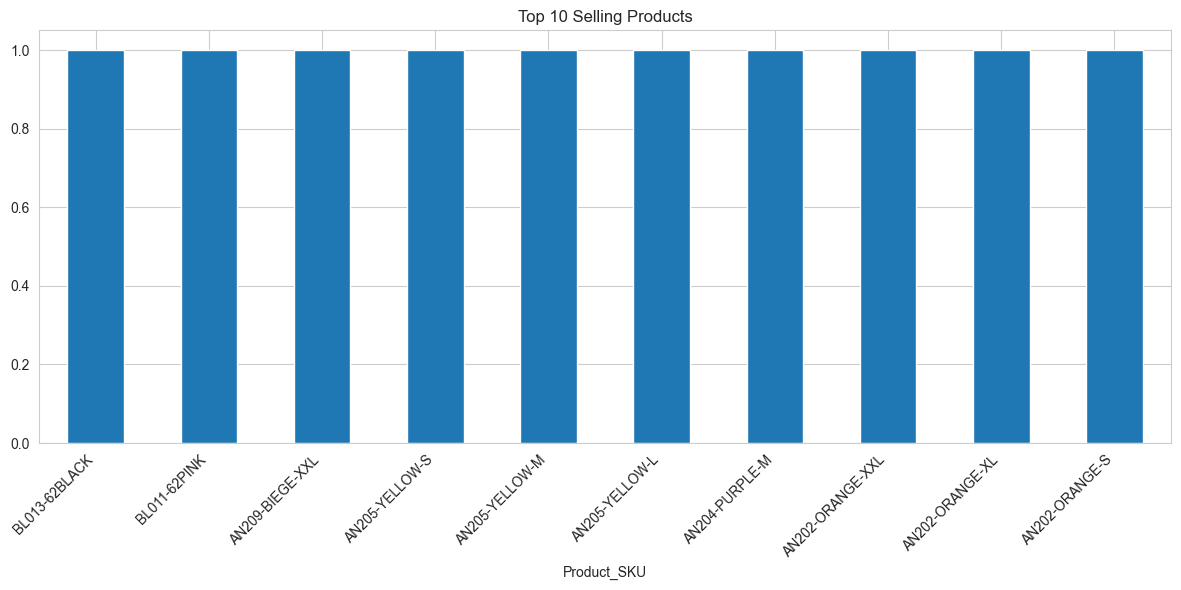

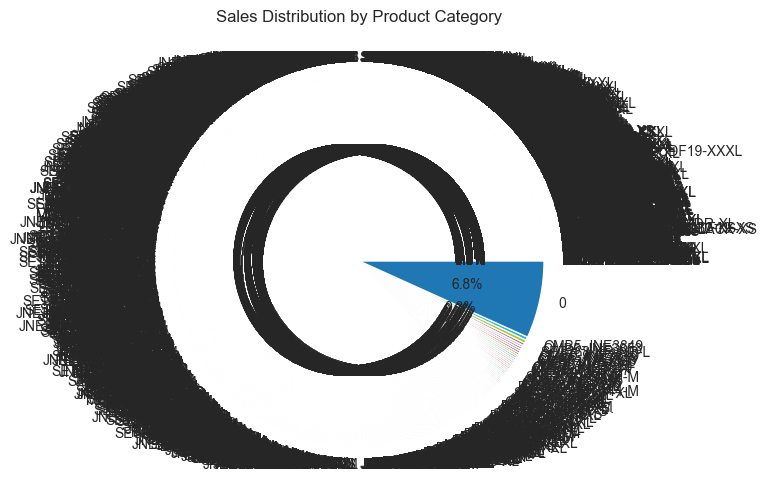

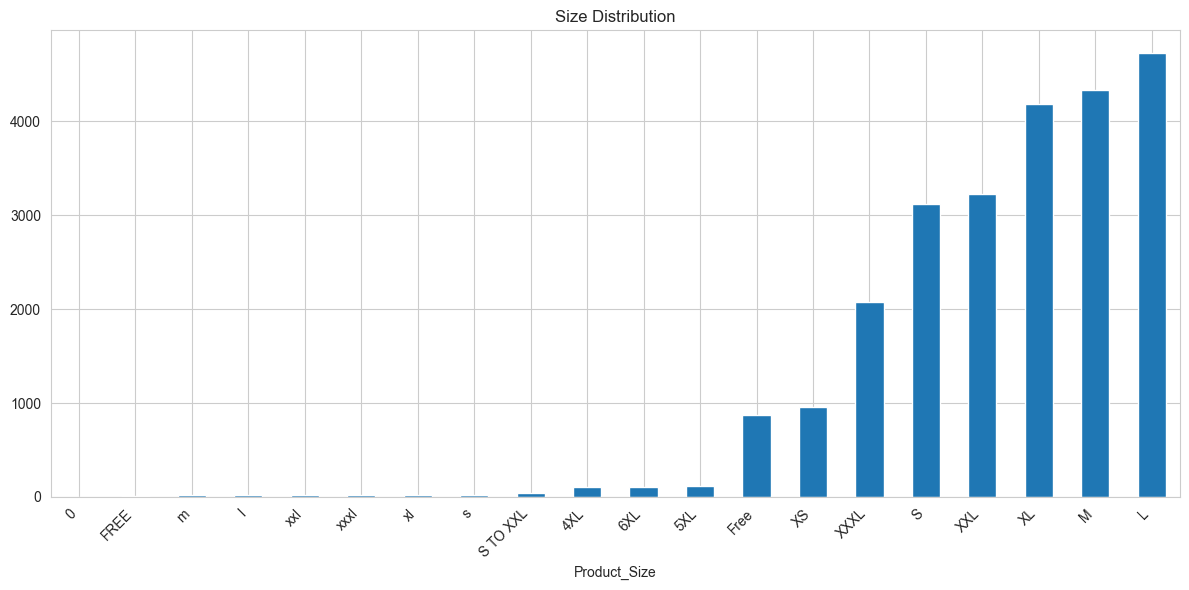

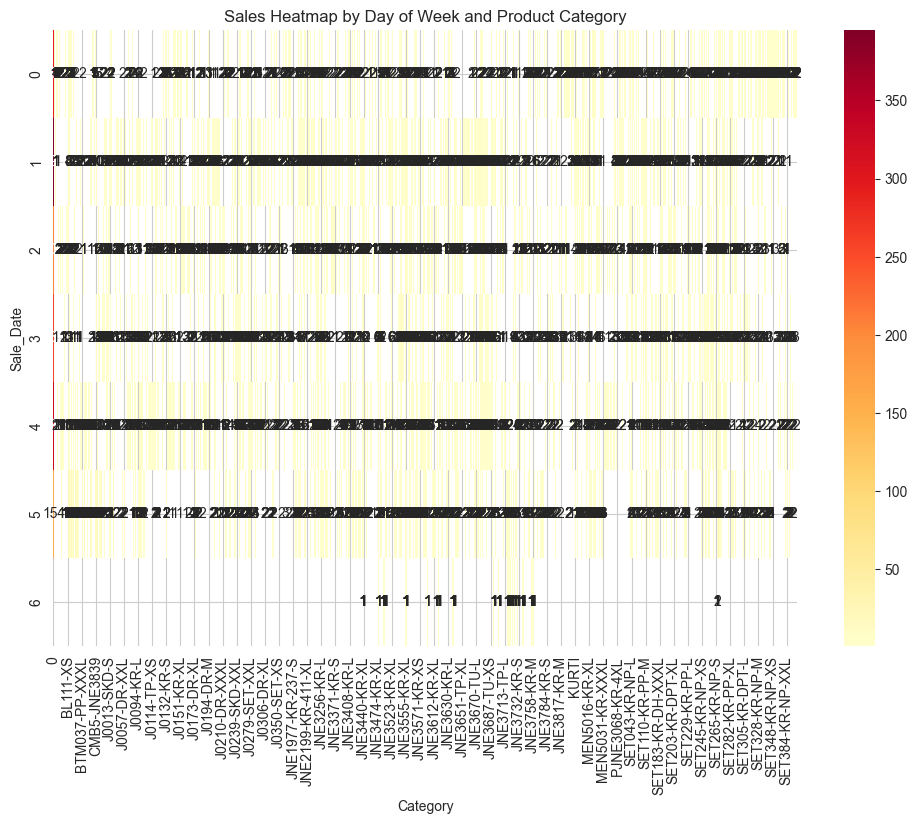

In [ ]:
# Visualizations
plt.figure(figsize=(12, 6))
sales_data.groupby('Sale_Date')['Quantity_Purchased'].sum().plot(title='Daily Sales Trend')
plt.savefig('daily_sales_trend.png')

plt.figure(figsize=(12, 6))
top_products.plot(kind='bar', title='Top 10 Selling Products')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('top_selling_products.png')

plt.figure(figsize=(10, 6))
category_sales.plot(kind='pie', autopct='%1.1f%%', title='Sales Distribution by Product Category')
plt.savefig('category_distribution.png')

plt.figure(figsize=(12, 6))
size_distribution.plot(kind='bar', title='Size Distribution')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('size_distribution.png')

plt.figure(figsize=(12, 8))
pivot = sales_data.pivot_table(values='Quantity_Purchased', index=sales_data['Sale_Date'].dt.dayofweek, columns='Category', aggfunc='sum')
sns.heatmap(pivot, cmap='YlOrRd', annot=True, fmt='g')
plt.title('Sales Heatmap by Day of Week and Product Category')
plt.savefig('sales_heatmap.png')

# Print insights
# print(f"Total sales: {total_sales} units")
# print("\nTop selling products:")
# print(top_products)
print("\nTop customers:")
print(top_customers)
print("\nProduct category performance:")
print(category_sales)
print("\nSize distribution:")
print(size_distribution)

# Additional insights from detailed_sales_data
print("\nDetailed Sales Data Insights:")
print(f"Total records: {len(detailed_sales_data)}")
print(f"Date range: {detailed_sales_data['DATE'].min()} to {detailed_sales_data['DATE'].max()}")
print("Top 5 customers by sales volume:")
print(detailed_sales_data.groupby('CUSTOMER')['PCS'].sum().sort_values(ascending=False).head())

In [ ]:
def read_csv_section(file_path, start_row, end_row):
    return pd.read_csv(file_path, skiprows=range(1, start_row), nrows=end_row-start_row if end_row else None)

file_path = 'data/International sale Report.csv'
sales_data = read_csv_section(file_path, 0, 18635)
sku_data = read_csv_section(file_path, 18637, 18658)
style_stock_data = read_csv_section(file_path, 18660, 19676)
detailed_sales_data = read_csv_section(file_path, 19677, None)

# def clean_data(df):

#     date_columns = ['Sale_Date']
#     for col in date_columns:
#         if col in df.columns:
#             df[col] = pd.to_datetime(df[col], errors='coerce')
    
#     numeric_columns = ['Quantity_Purchased', 'Price_per_Unit', 'Gross_Amount']
#     for col in numeric_columns:
#         if col in df.columns:
#             df[col] = pd.to_numeric(df[col], errors='coerce')
    
#     return df

# sales_data = clean_data(sales_data)
# sku_data = clean_data(sku_data)
# style_stock_data = clean_data(style_stock_data)

In [121]:
sales_data

,index,Sale_Date,Sale_Month,Customer_Name,Product_Style,Product_SKU,Product_Size,Quantity_Purchased,Price_per_Unit,Gross_Amount
0,0,6/5/2021,21-Jun,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-L,L,1,616.56,617.0
1,1,6/5/2021,21-Jun,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-XL,XL,1,616.56,617.0
2,2,6/5/2021,21-Jun,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-XXL,XXL,1,616.56,617.0
3,3,6/5/2021,21-Jun,REVATHY LOGANATHAN,MEN5009,MEN5009-KR-L,L,1,616.56,617.0
4,4,6/5/2021,21-Jun,REVATHY LOGANATHAN,MEN5011,MEN5011-KR-L,L,1,616.56,617.0
...,...,...,...,...,...,...,...,...,...,...
18630,18630,4/30/2022,22-Apr,Rino Sandaran,J0280,NaN,S,1,1812.50,1812.5
18631,18631,4/30/2022,22-Apr,Rino Sandaran,SET350,NaN,M,1,1512.50,1512.5
18632,18632,4/30/2022,22-Apr,Rino Sandaran,SET350,NaN,L,1,1512.50,1512.5
18633,18633,4/30/2022,22-Apr,Rino Sandaran,J0242,NaN,XXXL,1,1312.50,1312.5


In [122]:
sku_data

,index,Sale_Date,Sale_Month,Customer_Name,Product_Style,Product_SKU,Product_Size,Quantity_Purchased,Price_per_Unit,Gross_Amount
0,18636,JNE3826,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18637,JNE3827,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,18638,JNE3828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18639,JNE3853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,18640,JNE3855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,18641,JNE3858,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,18642,JNE3829,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,18643,JNE3830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,18644,JNE3849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,18645,JNE3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
style_stock_data

,index,Sale_Date,Sale_Month,Customer_Name,Product_Style,Product_SKU,Product_Size,Quantity_Purchased,Price_per_Unit,Gross_Amount
0,18659,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18660,Style,Stock,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,18661,MEN5004,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18662,MEN5009,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,18663,MEN5011,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1011,19670,J0419,313,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1012,19671,JNE3905,299,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1013,19672,23-Jan,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1014,19673,J0391,270,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
style_stock_data

,index,Sale_Date,Sale_Month,Customer_Name,Product_Style,Product_SKU,Product_Size,Quantity_Purchased,Price_per_Unit,Gross_Amount
0,18659,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18660,NaT,Stock,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,18661,NaT,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18662,NaT,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,18663,NaT,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1011,19670,NaT,313,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1012,19671,NaT,299,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1013,19672,NaT,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1014,19673,NaT,270,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
def read_csv_section(file_path, start_row, end_row):
    return pd.read_csv(file_path, skiprows=range(1, start_row), nrows=end_row-start_row if end_row else None)

file_path = 'data/International sale Report.csv'
sales_data = read_csv_section(file_path, 0, 18636)
sku_data = read_csv_section(file_path, 18637, 18658)
style_stock_data = read_csv_section(file_path, 18660, 19676)
detailed_sales_data = read_csv_section(file_path, 19677, 37433)

def clean_data(df):
    date_columns = ['Sale_Date']
    for col in date_columns:
        if col in df.columns:
            df[col] = pd.to_datetime(df[col], errors='coerce')
    
    numeric_columns = ['Quantity_Purchased', 'Price_per_Unit', 'Gross_Amount', 'PCS', 'RATE', 'GROSS AMT']
    for col in numeric_columns:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')
    
    return df

sales_data = clean_data(sales_data)
sku_data = clean_data(sku_data)
style_stock_data = clean_data(style_stock_data)
detailed_sales_data = clean_data(detailed_sales_data)

def analyze_sales(df):
    total_sales = df['Quantity_Purchased'].sum()
    top_products = df.groupby('Product_SKU')['Quantity_Purchased'].sum().sort_values(ascending=False).head(10)
    monthly_sales = df.groupby(df['Sale_Date'].dt.to_period('M'))['Gross_Amount'].sum()
    
    return total_sales, top_products, monthly_sales

total_sales, top_products, monthly_sales = analyze_sales(sales_data)

def merge_sales_and_stock(sales_df, stock_df):
    # Ensure 'Product_SKU' is of the same type in both DataFrames
    sales_df['Product_SKU'] = sales_df['Product_SKU'].astype(str)
    stock_df['Product_SKU'] = stock_df['Product_SKU'].astype(str)
    
    # Merge the DataFrames
    merged = pd.merge(sales_df, stock_df, on='Product_SKU', how='left')
    
    return merged

# Check if 'Product_SKU' exists in both DataFrames before merging
if 'Product_SKU' in sales_data.columns and 'Product_SKU' in style_stock_data.columns:
    merged_data = merge_sales_and_stock(sales_data, style_stock_data)
else:
    print("Error: 'Product_SKU' column not found in one or both DataFrames")
    merged_data = None

# Print some information about the merged data
if merged_data is not None:
    print(f"Merged data shape: {merged_data.shape}")
    print(f"Columns in merged data: {merged_data.columns.tolist()}")
else:
    print("Merging failed. Please check your data and column names.")

/var/folders/nr/khgwm2yx29l9jhcvccmdjmn8q2_1zk/T/ipykernel_42514/2251478933.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')
/var/folders/nr/khgwm2yx29l9jhcvccmdjmn8q2_1zk/T/ipykernel_42514/2251478933.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')
/var/folders/nr/khgwm2yx29l9jhcvccmdjmn8q2_1zk/T/ipykernel_42514/2251478933.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')


Merged data shape: (1457906, 19)
Columns in merged data: ['index_x', 'Sale_Date_x', 'Sale_Month_x', 'Customer_Name_x', 'Product_Style_x', 'Product_SKU', 'Product_Size_x', 'Quantity_Purchased_x', 'Price_per_Unit_x', 'Gross_Amount_x', 'index_y', 'Sale_Date_y', 'Sale_Month_y', 'Customer_Name_y', 'Product_Style_y', 'Product_Size_y', 'Quantity_Purchased_y', 'Price_per_Unit_y', 'Gross_Amount_y']


In [105]:
merged_data

,index_x,Sale_Date_x,Sale_Month_x,Customer_Name_x,Product_Style_x,Product_SKU,Product_Size_x,Quantity_Purchased_x,Price_per_Unit_x,Gross_Amount_x,index_y,Sale_Date_y,Sale_Month_y,Customer_Name_y,Product_Style_y,Product_Size_y,Quantity_Purchased_y,Price_per_Unit_y,Gross_Amount_y
0,0,2021-06-05,21-Jun,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-L,L,1.0,616.56,617.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2021-06-05,21-Jun,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-XL,XL,1.0,616.56,617.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2021-06-05,21-Jun,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-XXL,XXL,1.0,616.56,617.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2021-06-05,21-Jun,REVATHY LOGANATHAN,MEN5009,MEN5009-KR-L,L,1.0,616.56,617.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2021-06-05,21-Jun,REVATHY LOGANATHAN,MEN5011,MEN5011-KR-L,L,1.0,616.56,617.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457901,18635,NaT,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,19670.0,NaT,313,NaN,NaN,NaN,NaN,NaN,NaN
1457902,18635,NaT,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,19671.0,NaT,299,NaN,NaN,NaN,NaN,NaN,NaN
1457903,18635,NaT,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,19672.0,NaT,0,NaN,NaN,NaN,NaN,NaN,NaN
1457904,18635,NaT,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,19673.0,NaT,270,NaN,NaN,NaN,NaN,NaN,NaN


Total sales: 0.0 units

Top selling products:
Product_SKU
nan                 0.0
AN202-ORANGE-L      0.0
AN202-ORANGE-M      0.0
AN202-ORANGE-S      0.0
AN202-ORANGE-XL     0.0
AN202-ORANGE-XXL    0.0
AN204-PURPLE-M      0.0
AN205-YELLOW-L      0.0
AN205-YELLOW-M      0.0
AN205-YELLOW-S      0.0
Name: Quantity_Purchased_y, dtype: float64

Top customers:
Series([], Name: Gross_Amount_y, dtype: float64)

Product category performance:
Product_Size_x
4XL         0.0
5XL         0.0
6XL         0.0
FREE        0.0
Free        0.0
L           0.0
M           0.0
S           0.0
S TO XXL    0.0
XL          0.0
XS          0.0
XXL         0.0
XXXL        0.0
l           0.0
m           0.0
s           0.0
xl          0.0
xxl         0.0
xxxl        0.0
Name: Quantity_Purchased_y, dtype: float64


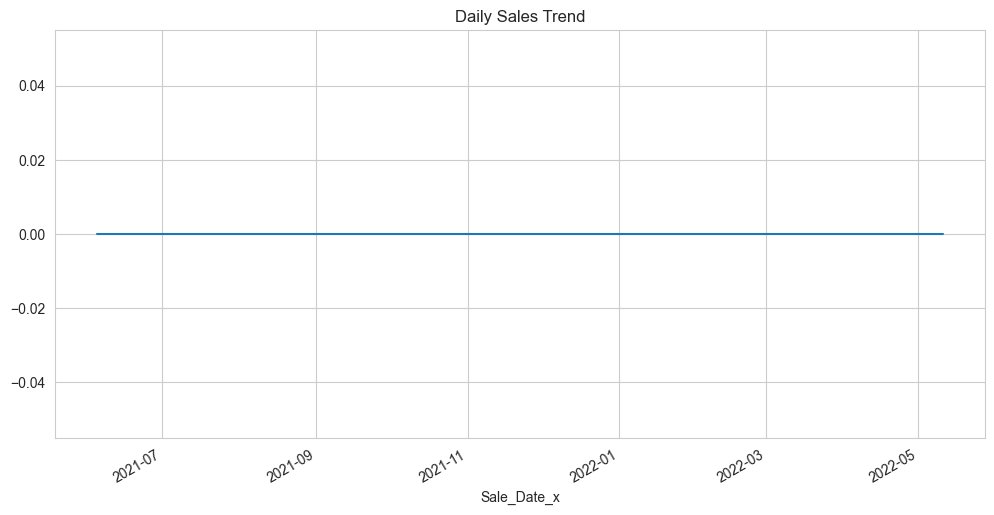

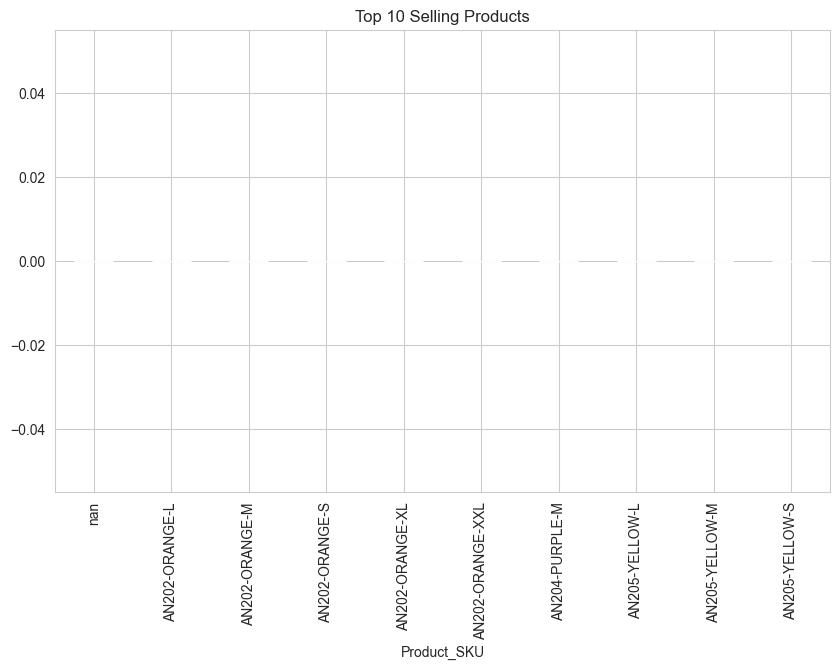

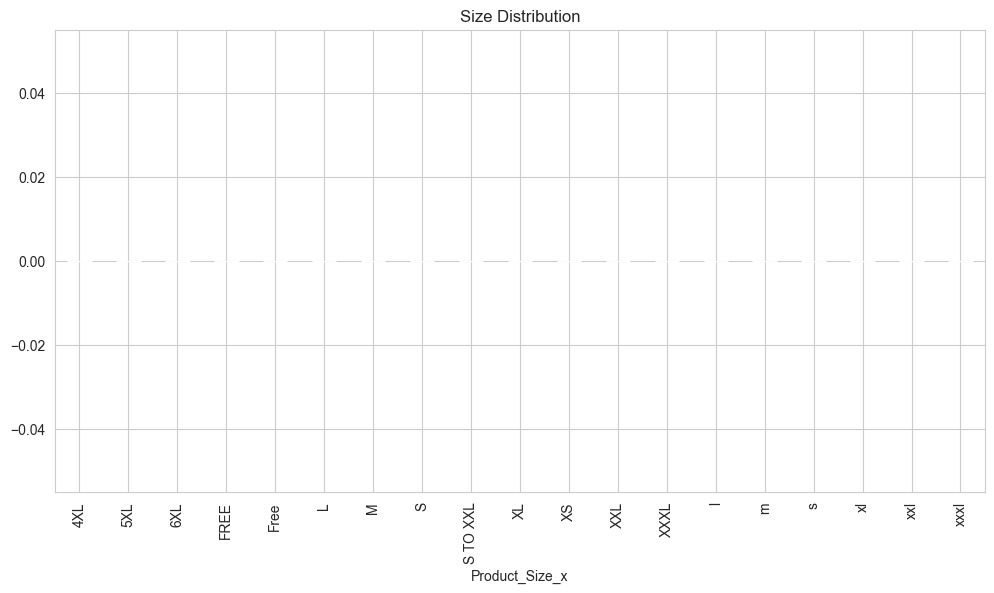

In [103]:
# Analysis and Visualization
total_sales = merged_data['Quantity_Purchased_y'].sum()

# Top selling products
top_products = merged_data.groupby('Product_SKU')['Quantity_Purchased_y'].sum().sort_values(ascending=False).head(10)

# Customer analysis
top_customers = merged_data.groupby('Customer_Name_y')['Gross_Amount_y'].sum().sort_values(ascending=False).head(5)


# Size distribution
size_distribution = merged_data.groupby('Product_Size_x')['Quantity_Purchased_y'].sum().sort_values(ascending=False)

# Visualizations
plt.figure(figsize=(12, 6))
merged_data.groupby('Sale_Date_x')['Quantity_Purchased_y'].sum().plot(title='Daily Sales Trend')
plt.savefig('daily_sales_trend.png')

plt.figure(figsize=(10, 6))
top_products.plot(kind='bar', title='Top 10 Selling Products')
plt.savefig('top_selling_products.png')

plt.figure(figsize=(12, 6))
size_distribution.plot(kind='bar', title='Size Distribution')
plt.savefig('size_distribution.png')

# Print insights
print(f"Total sales: {total_sales} units")
print("\nTop selling products:")
print(top_products)
print("\nTop customers:")
print(top_customers)
print("\nProduct category performance:")
# print(category_sales)
# print("\nSize distribution:")
print(size_distribution)

In [ ]:
# Cleaning
expense_df_cleaned = expense_df.iloc[1:].reset_index(drop=True)
expense_df_cleaned.columns = ["Index", "Date_Received", "Received_Amount", "Expense_Item", "Expense_Amount"]
expense_df_cleaned.drop(columns=["Index"], inplace=True)
expense_df_cleaned = expense_df_cleaned.drop(columns=["Date_Received"], errors="ignore")
expense_df_cleaned["Received_Amount"] = pd.to_numeric(expense_df_cleaned["Received_Amount"], errors='coerce')
expense_df_cleaned["Expense_Amount"] = pd.to_numeric(expense_df_cleaned["Expense_Amount"], errors='coerce')

# Imputing missing values
expense_df_cleaned['Received_Amount'].fillna(0, inplace=True)
expense_df_cleaned['Expense_Amount'].fillna(0, inplace=True)


# Drop last row as it contains total values
expense_df_cleaned.drop(expense_df_cleaned.tail(3).index, inplace=True)


/var/folders/nr/khgwm2yx29l9jhcvccmdjmn8q2_1zk/T/ipykernel_42514/2445936340.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  expense_df_cleaned['Received_Amount'].fillna(0, inplace=True)
/var/folders/nr/khgwm2yx29l9jhcvccmdjmn8q2_1zk/T/ipykernel_42514/2445936340.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are sett

In [67]:
# Convert Sale_Date to datetime
int_sales_df['Sale_Date'] = pd.to_datetime(int_sales_df['Sale_Date'])

# Remove any duplicate rows
int_sales_df = int_sales_df.drop_duplicates()

# Handle missing values
int_sales_df['Quantity_Purchased'] = int_sales_df['Quantity_Purchased'].fillna(int_sales_df['Quantity_Purchased'].median())
int_sales_df['Price_per_Unit'] = int_sales_df['Price_per_Unit'].fillna(int_sales_df['Price_per_Unit'].median())
int_sales_df['Gross_Amount'] = int_sales_df['Gross_Amount'].fillna(int_sales_df['Gross_Amount'].median())

# Remove rows with missing values in critical columns
int_sales_df = int_sales_df.dropna(subset=['Sale_Date', 'Customer_Name', 'Product_SKU'])

# Correct data types
int_sales_df['Quantity_Purchased'] = int_sales_df['Quantity_Purchased'].astype(int)
int_sales_df['Price_per_Unit'] = int_sales_df['Price_per_Unit'].astype(float)
int_sales_df['Gross_Amount'] = int_sales_df['Gross_Amount'].astype(float)

# Create a category column based on Product_SKU
int_sales_df['Category'] = int_sales_df['Product_SKU'].apply(lambda x: x.split('-')[0])

ValueError: time data "SKU" doesn't match format "%m/%d/%Y", at position 162. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

May-2022

In [ ]:
may_df.head()

,index,Product_SKU,Product_Style_ID,Product_Catalog,Product_Category,Product_Weight,Transfer_Price,Old_MRP,Final_Old_MRP,Ajio_MRP,Amazon_MRP,Amazon_FBA_MRP,Flipkart_MRP,Limeroad_MRP,Myntra_MRP,Paytm_MRP,Snapdeal_MRP
0,0,Os206_3141_S,Os206_3141,Moments,Kurta,0.3,538,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
1,1,Os206_3141_M,Os206_3141,Moments,Kurta,0.3,538,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
2,2,Os206_3141_L,Os206_3141,Moments,Kurta,0.3,538,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
3,3,Os206_3141_XL,Os206_3141,Moments,Kurta,0.3,538,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
4,4,Os206_3141_2XL,Os206_3141,Moments,Kurta,0.3,538,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295


P L March

In [19]:
pl_df.head()

,index,Product_SKU,Product_Style_ID,Product_Catalog,Product_Category,Product_Weight,Transfer_Price_Level_1,Transfer_Price_Level_2,Old_MRP,Final_Old_MRP,Ajio_MRP,Amazon_MRP,Amazon_FBA_MRP,Flipkart_MRP,Limeroad_MRP,Myntra_MRP,Paytm_MRP\n,Snapdeal_MRP
0,0,Os206_3141_S,Os206_3141,Moments,Kurta,0.3,538,435.78,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
1,1,Os206_3141_M,Os206_3141,Moments,Kurta,0.3,538,435.78,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
2,2,Os206_3141_L,Os206_3141,Moments,Kurta,0.3,538,435.78,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
3,3,Os206_3141_XL,Os206_3141,Moments,Kurta,0.3,538,435.78,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
4,4,Os206_3141_2XL,Os206_3141,Moments,Kurta,0.3,538,435.78,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295


Sale Report

In [20]:
sales_df.head()

,index,Product_SKU,Design_Number,Stock_Level,Product_Category,Product_Size,Product_Color
0,0,AN201-RED-L,AN201,5.0,AN : LEGGINGS,L,Red
1,1,AN201-RED-M,AN201,5.0,AN : LEGGINGS,M,Red
2,2,AN201-RED-S,AN201,3.0,AN : LEGGINGS,S,Red
3,3,AN201-RED-XL,AN201,6.0,AN : LEGGINGS,XL,Red
4,4,AN201-RED-XXL,AN201,3.0,AN : LEGGINGS,XXL,Red
